In [1]:
import os
import numpy as np
import re
import pandas as pd
from bs4 import BeautifulSoup
from transformers import GPT2Model, GPT2Config
import random

# Scrap methods

### METHOD 1

In [2]:
# Setting variables to be used in format string command below
tweet_count = 10300
username = "elonmusk"

In [3]:
#Note: runtime is around 5 minutes
# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results {} twitter-search 'from:{}'> user-tweets.json".format(tweet_count, username))
# Reads the json generated from the CLI command above and creates a pandas dataframe
tweets_df1 = pd.read_json('user-tweets.json', lines=True)

# Displays first 5 entries from dataframe
tweets_df1.head()

""


In [20]:
#save raw
file_name = "data/tweets_{user}_{count}_m1".format(user = username, count = tweet_count)
tweets_df1.to_csv(file_name+".csv", sep=',', index=False)

### Method 2
Not using as not enough information

In [ ]:
# Run the pip install command below if you don't already have the library
# !pip install git+https://github.com/JustAnotherArchivist/snscrape.git

# Run the below command if you don't already have Pandas
# !pip install pandas

# Imports
import snscrape.modules.twitter as sntwitter
import pandas as pd


In [ ]:
# Creating a dataframe from the tweets list above
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df2 = pd.DataFrame(tweets_list1)
# Display first 5 entries from dataframe
tweets_df2.head()

In [ ]:
# Export dataframe into a CSV
file_name = "data/"+"tweets_{user}_{count}_m1".format(user = username, count = maxTweets)
tweets_df2.to_csv('user-tweets2.csv', sep=',', index=False)

In [ ]:
tweets_df1.iloc[:, 2]
# raw_html = tweets_df1.iloc[0, 2]

In [ ]:
#Clean text experiment:

print("original\n", tweets_df1.iloc[0, 2])

clean_text = BeautifulSoup( tweets_df1.iloc[0, 2], "lxml").get_text(strip=True)
print("filtered\n",clean_text)

## Cleaning dataset (method 1 data)
1. Remove all retweets
Filter text
1. Remove all url and picture links
2. Remove short tweets
3. Remove extra spaces 
4. Special character encoding

Save File 
4. Save to csv file

In [2]:
#import API
from api.filter import filter_manual, gen_input
import pandas as pd
#Read in data 
# file_name = file_name+".csv" #Insert file here
file_name = 'data/tweets_elonmusk_20000_m1.csv'
lang_choice = 'en'
length_min = 4 #minimum tweet length


data = pd.read_csv(file_name)
df = data[['date','renderedContent', 'lang', 'sourceLabel', 'outlinks','media','retweetedTweet','quotedTweet','inReplyToUser','place']].copy()

#Filter then Save as csv and txt
data_new = filter_manual(df, length_min, lang_choice)
data_new_lst = []
data_new_lst.append(data_new)
epochs = 4 #Shuffle parameter, see gen_input
data_save = gen_input(data_new_lst,epochs)
#TXT:
with open("data/"+"cleaned_{user}_{count}".format(user = username, count = tweet_count)+'.txt', 'w',encoding='utf-8') as f:
    # for tweet in data_new:
    #     f.write(tweet)
    #     # print(tweet,"AHHH")
    #     f.write('\n')
    f.write(data_save)

    f.close()


df_clean = pd.DataFrame(data_new,columns=["Tweets"])
file_name = "data/"+"cleaned_{user}_{count}_m1".format(user = username, count = tweet_count)
df_clean.to_csv(file_name+".csv", sep=',', index=False)

C:\Users\andre\AppData\Local\Temp\ipykernel_17672\1980682677.py:11: DtypeWarning: Columns (16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_name)
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


# Politeness filtering

Dataset already exists at /home/ecbm4040/.convokit/downloads/wikipedia-politeness-corpus


31550it [00:03, 9959.08it/s] 


1000/4353 utterances processed
2000/4353 utterances processed
3000/4353 utterances processed
4000/4353 utterances processed
4353/4353 utterances processed
1000/31550 utterances processed
2000/31550 utterances processed
3000/31550 utterances processed
4000/31550 utterances processed
5000/31550 utterances processed
6000/31550 utterances processed
7000/31550 utterances processed
8000/31550 utterances processed
9000/31550 utterances processed
10000/31550 utterances processed
11000/31550 utterances processed
12000/31550 utterances processed
13000/31550 utterances processed
14000/31550 utterances processed
15000/31550 utterances processed
16000/31550 utterances processed
17000/31550 utterances processed
18000/31550 utterances processed
19000/31550 utterances processed
20000/31550 utterances processed
21000/31550 utterances processed
22000/31550 utterances processed
23000/31550 utterances processed
24000/31550 utterances processed
25000/31550 utterances processed
26000/31550 utterances proces

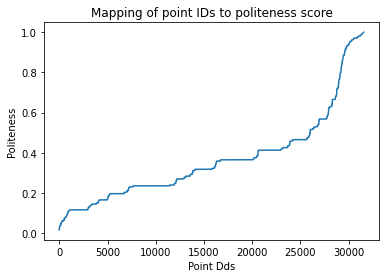

In [7]:
#import API
from api.filter import filter_manual, gen_input
from api.politeness import generate_politeness
import pandas as pd
#Stuff to run for first time:
# python -m spacy download en_core_web_sm
# pipip uninstall emoji
# pip install emoji==1.7

#Read in data 
############################################################
#PARAMETERS:
username = 'joerogan'
tweet_count = 50000
file_name = 'data/cleaned_joerogan_45900_m1.csv'
lang_choice = 'en'
length_min = 4 #minimum tweet length
#politeness params
corpus_train = 'wikipedia'
percentage_top_tweets = 0.25
polite_or_impolite = 'impolite'
############################################################



df = pd.read_csv(file_name)
df_politeness = generate_politeness(df, corpus_train, percentage_top_tweets,polite_or_impolite) #choose by politeness
print("number of data points",len(df_politeness))
data_new = df_politeness["Tweets"]
data_new_lst = []
data_new_lst.append(data_new)
epochs = 4 #Shuffle parameter, see gen_input
data_save = gen_input(data_new_lst,epochs)

with open("data/"+"{polite}_{user}_{count}_{perc}_finalnum{total}".format(polite = polite_or_impolite, user = username, count = tweet_count,perc=percentage_top_tweets,total=len(df_politeness))+'.txt', 'w',encoding='utf-8') as f:
    # for tweet in data_new:
    #     f.write(tweet)
    #     # print(tweet,"AHHH")
    #     f.write('\n')
    f.write(data_save)

    f.close()
